<a href="https://colab.research.google.com/github/qudsiramiz/csp_datanalysis/blob/main/data_analysis_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install geopack ([details here](https://pypi.org/project/geopack/))

In [ ]:
!pip install geopack

## Install all Latex dependencies

In [ ]:
%%time
!sudo apt-get install aptitude
!sudo aptitude install texlive-fonts-recommended texlive-fonts-extra
!pip install tex
!sudo apt-get -y install texlive-full
!sudo apt-get install dvipng
!sudo apt-get install --fix-missing
!sudo apt-get update
clear_output()

In [ ]:
font = { 'family' : 'Times New Roman', 'weight' : 'normal', 'size' : 10 }
plt.rc( 'font', **font )
plt.rc('text', usetex=True)

# Import the required package and call the functions

In [ ]:
import geopack
from geopack import geopack
from geopack.t96 import t96
import numpy as np
from dateutil import parser
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl

Load IGRF coefficients ...


In [ ]:
geopack?

In [ ]:
# Define time
time = '2016-12-24 15:08'

In [ ]:
time_utc = parser.parse(time)
time_unix = time_utc.timestamp()
time_unix

1482592080.0

In [ ]:
# Compute the 
xgsm,ygsm,zgsm = [1,2,3] # in radius of earth units
ps = geopack.recalc(time_unix) # dipole tilt angle of the earth

# Compute the dipole field
b0xgsm,b0ygsm,b0zgsm = geopack.dip(xgsm,ygsm,zgsm)

In [ ]:
b0xgsm, b0ygsm, b0zgsm

(-467.8721390407777, -646.5015441840932, -418.7106595944902)

#### The magnetospheric magnetic field is a combination of internal magnetic field, comuted using IGRF model, and external magnetic field, computed using T96 model in Geopack.
$R_E$
Way to call the two models and inputs required:

*   IGRF model:

    a) [x, y, z] in GSM coordinate in units of $R_E$

    b) Call the model using ```geopack.igrf_gsm(x, y, z)```


*   T96 model:

    a) Input parameter:

       (i) [x, y, z] in GSM coordinate in units of $R_E$.

       (ii) Solar wind ram pressure in nPa (```p_dyn```). ($P = m_p \cdot n_p \cdot V_p^2 = 1.6726 \times 10^{-6} \cdot n_p \cdot V_p^2$ nPa)

       (iii) DST index (```dst```)

       (iv) Dipole tilt angle (```ps```)

       (v) y- and z-component of IMF ($\vec{B}_{\rm{imf}} \cdot \hat{y}$, and 

       $\vec{B}_{\rm{imf}} \cdot \hat{z}$) (```b_imf_y, b_imf_z```)

    b) Define a ```param``` parameter as ```param = [p_dyn, dst, b_imf_y, b_imf_z, 0, 0, 0, 0, 0, 0]``` (the 6 zeros at the end is for some progmatic reasons).

    c) Call the model using ```t96(param, ps, x, y, z)```

In [ ]:
time = '2016-12-24 15:08'
time_utc = parser.parse(time)
time_unix = time_utc.timestamp()

ps = geopack.recalc(time_unix) # Compute the dipole tilt angle

In [ ]:
n_p = 5 # /cm^{-3}
v_p = 500 # km/s
b_imf_x = -5 # nT
b_imf_y = 2 # nT
b_imf_z = 1 # nT

dst = -20

p_dyn = 1.6726e-6 * n_p * v_p**2 # nPa

In [ ]:
n_arr = 160
bx_igrf = np.full((n_arr, n_arr), np.nan)
by_igrf = np.full((n_arr, n_arr), np.nan)
bz_igrf = np.full((n_arr, n_arr), np.nan)

bx_t96 = np.full((n_arr, n_arr), np.nan)
by_t96 = np.full((n_arr, n_arr), np.nan)
bz_t96 = np.full((n_arr, n_arr), np.nan)

bx = np.full((n_arr, n_arr), np.nan)
by = np.full((n_arr, n_arr), np.nan)
bz = np.full((n_arr, n_arr), np.nan)

x_arr = 10
y_arr = np.linspace(-40, 40, n_arr)
z_arr = np.linspace(-40, 40, n_arr)

param = [p_dyn, dst, b_imf_y, b_imf_z, 0, 0, 0, 0, 0, 0]

for (j,y) in enumerate(y_arr):
    for (k,z) in enumerate(z_arr):
        bx_igrf[j, k], by_igrf[j, k], bz_igrf[j, k] = geopack.igrf_gsm(x_arr, y, z)
        bx_t96[j, k], by_t96[j, k], bz_t96[j, k] = t96(param, ps, x_arr, y, z)

        bx[j, k] = bx_t96[j, k] + bx_igrf[j, k]
        by[j, k] = by_t96[j, k] + by_igrf[j, k]
        bz[j, k] = bz_t96[j, k] + bz_igrf[j, k]

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as patches

In [ ]:
np.nanmin(bx)

-22867310104333.86

In [ ]:
cmap = plt.cm.viridis

pad = 0.02
clabelpad = 10
labelsize = 18
ticklabelsize = 15
cticklabelsize = 15
clabelsize = 15
ticklength = 3
tickwidth = 1.5
ticklength = 6
mticklength = 4
cticklength = 5
mcticklength = 4
labelrotation = 0

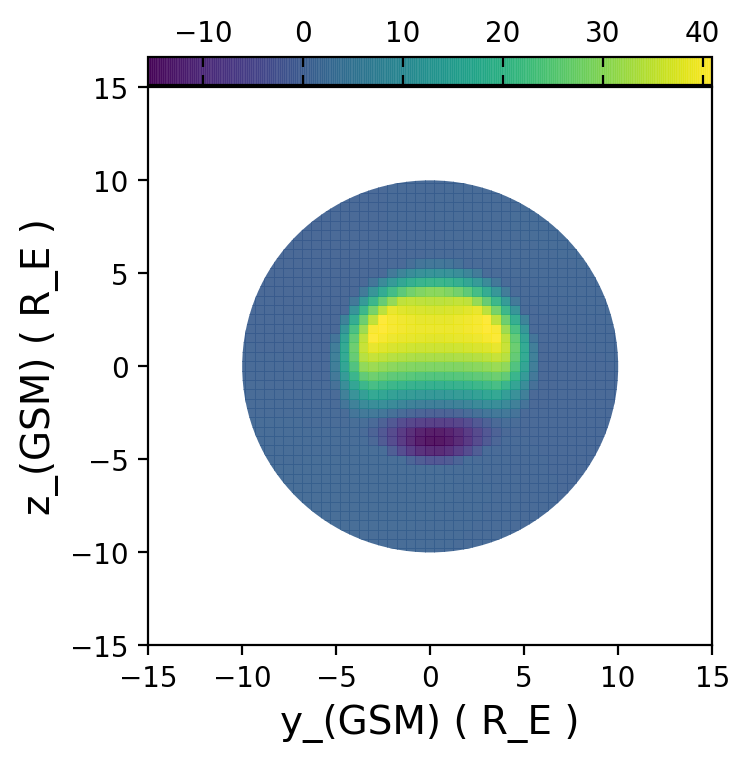

In [ ]:
# Define the figure
fig = plt.figure(num=None, figsize=(3, 3), dpi=200, facecolor='w', edgecolor='gray')
fig.subplots_adjust(left=0.01, right=0.95, top=0.99, bottom=0.01, wspace=0.02, hspace=0.)

comp = bz

# Define the colorbar norm
norm = mpl.colors.Normalize(vmin=np.nanmin(comp), vmax=np.nanmax(comp))

# Define the axes in the figure
axs1 = fig.add_subplot(1, 1, 1)

im1 = axs1.pcolormesh(y_arr, z_arr, np.transpose(comp), alpha=0.9, shading='auto', cmap=cmap,
                      norm=norm)
patch = patches.Circle((0, 0), radius=10, transform=axs1.transData)
im1.set_clip_path(patch)

axs1.set_xlim(-15, 15)
axs1.set_ylim(-15, 15)

axs1.set_xlabel( r'$\mathrm{y_{GSM}} ( R_E )$', fontsize=14 )
axs1.set_ylabel( r'$\mathrm{z_{GSM}} ( R_E )$', fontsize=14 )

# Create a new axis for colorbar
divider1 = make_axes_locatable(axs1)

cax1 = divider1.append_axes("top", size="5%", pad=0.01 )
cbar1 = plt.colorbar(im1, cax=cax1, orientation='horizontal', ticks=None, fraction=0.05, pad=0.01)

cbar1.ax.xaxis.set_label_position('top')
cbar1.ax.tick_params(axis='x', direction='in', labeltop=True, labelbottom=False, color='k',top=True,
                     bottom=True)